[ Info: Saved animation to C:\Users\fwdan\JuliaProjects\1DWaveTest.gif


Plots.AnimatedGif("C:\\Users\\fwdan\\JuliaProjects\\1DWaveTest.gif")
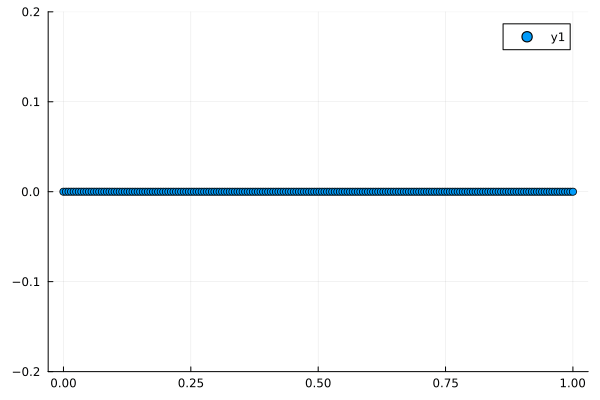

In [57]:
using Plots
using LinearAlgebra
dt = 0.01
Xsteps = 200
X = range(0,1,length=Xsteps)
dx = 1/Xsteps
c = 1
C = c*dt/dx
C2 = C^2

outer_diag = -C2*ones(Xsteps-1)
main_diag = (1+2*C2)*ones(Xsteps)

A = Tridiagonal(outer_diag,main_diag,outer_diag)
#init(x,θ) = x>0.5 ? sin(2π*(x+θ)) : 0
#init(x,θ) = sin(2π*(x+θ))
init(x,θ) = 0

f(x,t) = x<0.1 ? 5*sin((2π/100)*t) : 0

function time_step(U,U_1,A,X,d2t,t)
    b = 2U - U_1 + d2t*f.(X,t)
    V = A\b
    V[begin]=0
    V[end]=0
    return V
end
    
V_2 = init.(X,0)
V_1 = init.(X,0.005)

function wave_gif(V_1,V_2,A,X,d2t)
    anim = @animate for t in 1:400
        V_0 = time_step(V_1,V_2,A,X,d2t,t)
        scatter(X,V_0,ylim=(-0.2,0.2))
        V_2 = V_1
        V_1 = V_0
    end
    gif(anim,"1DWaveTest.gif",fps=40)
end

wave_gif(V_1,V_2,A,X,dt^2)